In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
       
print(f'latest_date is {latest_date}')

latest_date is ('2017-08-23',)


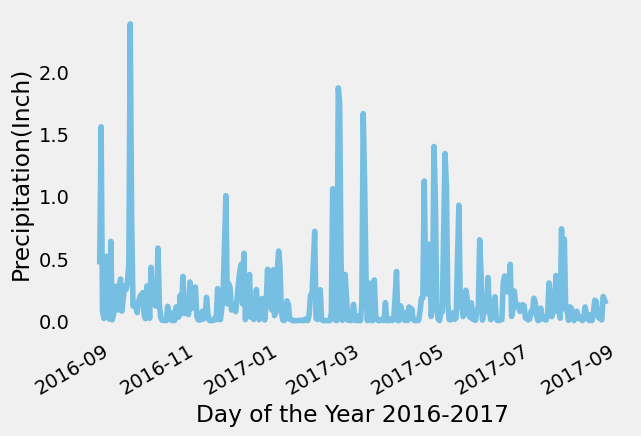

<Figure size 5000x480 with 0 Axes>

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)
prev_year

        
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
climate_df = pd.DataFrame(results, columns=['date', 'precipitation'])

climate_df['date']= pd.to_datetime(climate_df['date'])

climate_df = climate_df.dropna(how='any')
climate_df.count()
# Sort the dataframe by date
climate_df = climate_df.sort_values("date", ascending=True).reset_index(drop=True) 
climate_df.tail()
climate_df_1year = climate_df.groupby(["date"]).mean()
climate_df_1year
# Use Pandas Plotting with Matplotlib to plot the data
climate_df_1year.plot(x_compat=True,alpha=0.5)
plt.xlabel('Day of the Year 2016-2017')
plt.ylabel('Precipitation(Inch)')
plt.grid(False)
plt.legend().set_visible(False)
plt.figure().set_figwidth(50)
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
climate_df_1year.describe()

,precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
result = session.query(station.station).group_by(station.station).count()
print(f'Total Station is  {result}')

Total Station is  9


In [67]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(station.station,func.count(measurement.station)).filter(station.station == measurement.station).group_by(station.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281')[0][0]
print(f'Minimum Temp is {min_temp}')

Minimum Temp is 54.0


In [73]:
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281')[0][0]
print(f'Maximum Temp is {max_temp}')

Maximum Temp is 85.0


In [74]:
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')[0][0]
print(f'Average Temp is {avg_temp}')

Average Temp is 71.66378066378067


In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281_list = [(min_temp,max_temp,avg_temp)]
USC00519281_list

[(54.0, 85.0, 71.66378066378067)]

array([[<Axes: title={'center': 'temp'}>]], dtype=object)

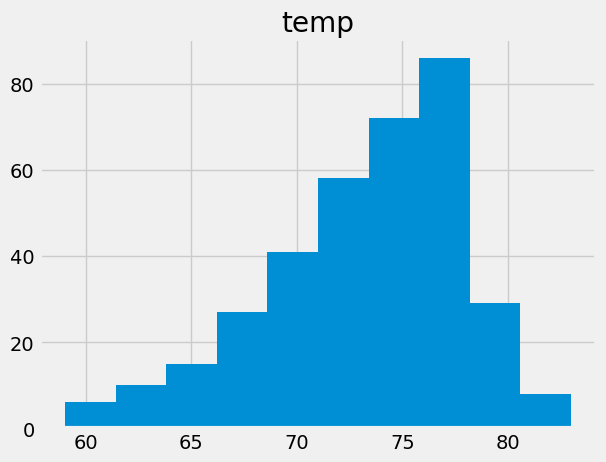

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.date, measurement.tobs).filter(measurement.date >= prev_year).filter(measurement.station == 'USC00519281').all()
results[:10]
USC00519281_df = pd.DataFrame(results, columns=['date', 'temp'])
USC00519281_df.hist()

# Close Session

In [16]:
# Close Session
session.close()